In [32]:
import pandas as pd
import xlrd

In [33]:
workbook = pd.read_stata('lawschs1_1.dta')

In [34]:
workbook

,lsat,gpa,race,resident,college,year,gender,admit,black,hispanic,asian,white,missingrace,urm,enroll
0,156.0,3.71,White,0.0,Arizona State,2006,0.0,1.0,0.0,0.0,0,1,0,0,0.0
1,161.0,3.85,White,0.0,Arizona State,2006,0.0,1.0,0.0,0.0,0,1,0,0,0.0
2,160.0,3.20,White,0.0,Arizona State,2006,1.0,0.0,0.0,0.0,0,1,0,0,NaN
3,132.0,2.95,,1.0,Arizona State,2006,1.0,0.0,0.0,0.0,0,0,1,0,NaN
4,159.0,3.49,White,0.0,Arizona State,2006,1.0,0.0,0.0,0.0,0,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124552,179.0,3.72,White,1.0,Washington,2006,0.0,1.0,0.0,0.0,0,1,0,0,0.0
124553,179.0,3.96,Asian,1.0,Washington,2006,0.0,1.0,0.0,0.0,1,0,0,0,0.0
124554,179.0,3.97,White,0.0,Washington,2006,0.0,1.0,0.0,0.0,0,1,0,0,0.0
124555,180.0,3.29,White,0.0,Washington,2006,1.0,1.0,0.0,0.0,0,1,0,0,1.0


In [35]:
workbook = workbook.replace(r'^\s*$', '*', regex=True)

In [36]:
workbook = workbook.drop(['black','hispanic','asian','white','missingrace','enroll','urm'],axis=1)

In [37]:
workbook.fillna('*').to_csv('lawschs1_1.csv')

In [38]:
workbook

,lsat,gpa,race,resident,college,year,gender,admit
0,156.0,3.71,White,0.0,Arizona State,2006,0.0,1.0
1,161.0,3.85,White,0.0,Arizona State,2006,0.0,1.0
2,160.0,3.20,White,0.0,Arizona State,2006,1.0,0.0
3,132.0,2.95,*,1.0,Arizona State,2006,1.0,0.0
4,159.0,3.49,White,0.0,Arizona State,2006,1.0,0.0
...,...,...,...,...,...,...,...,...
124552,179.0,3.72,White,1.0,Washington,2006,0.0,1.0
124553,179.0,3.96,Asian,1.0,Washington,2006,0.0,1.0
124554,179.0,3.97,White,0.0,Washington,2006,0.0,1.0
124555,180.0,3.29,White,0.0,Washington,2006,1.0,1.0


/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([88033.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 32229.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

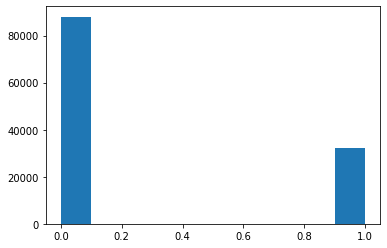

In [39]:
import matplotlib.pyplot as plt
plt.hist(workbook['admit'])

In [40]:
from fcit import fcit


def nonparametric_fcit_test(X, Y, Z, data):
    """
    X and Y are names of variables.
    Z is a list of names of variables.
    data is a pandas data frame.

    Return a float corresponding to the p-value computed from FCIT.
    """

    # implement code here
    data_X = np.asmatrix(data[[X]].to_numpy())
    data_Y = np.asmatrix(data[[Y]].to_numpy())
    data_Z = np.asmatrix(data[Z].to_numpy())
    return fcit.test(data_X, data_Y, data_Z)

In [41]:
import numpy as np

In [42]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.special import expit


def odds_ratio(X, Y, Z, data):
    """
    Compute the odds ratio OR(X, Y | Z).
    X, Y are names of variables
    in the data frame. Z is a list of names of variables.

    Return float OR for the odds ratio OR(X, Y | Z)
    """

    # Implement your code here:
    Xtrain = data[[Y] + Z]
    Xtrain.insert(0, 'Ones', 1)
    ytrain = data[[X]]
    log_reg = sm.Logit(ytrain, Xtrain).fit(disp=0)
    beta_1 = log_reg.params.values[1]
    OR = np.exp(beta_1)
    
    return OR

In [134]:
race = list(workbook[['race']])
admit = list(workbook[['admit']])
lsat = list(workbook[['lsat']])
gpa = list(workbook[['gpa']])

In [130]:
for i in range(len(race)):
    if i == len(race):
        break

    if race[i] == "White":
        race[i] = 1
    elif race[i] == '*':
        race[i] = 0
    elif race[i] == "Asian":
        race[i] = 2
    elif race[i] == "Black":
        race[i] = 3
    elif race[i] == "Hispanic":
        race[i] = 4

In [131]:
i = 0
while i < len(race):
    if pd.isna(admit[i][0]):
        print()
        del admit[i]
        del race[i]
        del lsat[i]
        del gpa[i]
    else:
        i = i+1

In [162]:
import math
data = {'lsat': [], 'gpa': [], 'race':[], 'admit':[]}  
data = pd.DataFrame(columns=('lsat', 'gpa', 'race', 'admit'))

for index, row in workbook.iterrows():
    if math.isnan(row[0]) or math.isnan(row[1]) or math.isnan(row[7]):
        continue
    else:
        new_row = row
        if row[2] == '*':
            new_row[2] = 0
        elif row[2] == 'White':
            new_row[2] = 1
        elif row[2] == 'Asian':
            new_row[2] = 2
        elif row[2] == 'Black':
            new_row[2] = 3
        elif row[2] == 'Hispanic':
            new_row[2] = 4
        data.loc[index] = new_row

In [163]:
data

,lsat,gpa,race,admit
0,156.0,3.71,1,1.0
1,161.0,3.85,1,1.0
2,160.0,3.20,1,0.0
3,132.0,2.95,0,0.0
4,159.0,3.49,1,0.0
...,...,...,...,...
124552,179.0,3.72,1,1.0
124553,179.0,3.96,2,1.0
124554,179.0,3.97,1,1.0
124555,180.0,3.29,1,1.0


In [175]:
data['race'] = data['race'] * 0.25

In [176]:
data

,lsat,gpa,race,admit
0,156.0,3.71,0.25,1.0
1,161.0,3.85,0.25,1.0
2,160.0,3.20,0.25,0.0
3,132.0,2.95,0,0.0
4,159.0,3.49,0.25,0.0
...,...,...,...,...
124552,179.0,3.72,0.25,1.0
124553,179.0,3.96,0.5,1.0
124554,179.0,3.97,0.25,1.0
124555,180.0,3.29,0.25,1.0


In [178]:
odds_ratio("race", "admit", [], data.astype(float))

0.9059681854213831

In [179]:
odds_ratio("race", "admit", ["gpa"], data.astype(float))

1.0151255557984287

In [180]:
odds_ratio("race", "admit", ["lsat"], data.astype(float))

1.1871617843528481

In [181]:
odds_ratio("race", "admit", ["lsat", "gpa"], data.astype(float))

1.2294002430115953

In [182]:
def compute_confidence_intervals(X, Y, Z, data, num_bootstraps=200, alpha=0.05):
    """
    Compute confidence intervals through bootstrap

    Returns tuple (q_low, q_up) for the lower and upper quantiles of the confidence interval.
    """
    
    Ql = alpha/2
    Qu = 1 - alpha/2
    estimates = []
    data_length = data.shape[0]
    
    for i in range(num_bootstraps):
       
        # Implement your code here:
        resampled_data = data.sample(n=data_length, replace=True)
        estimates.append(odds_ratio(X, Y, Z, resampled_data))

    q_low = np.quantile(estimates, Ql)
    q_up = np.quantile(estimates, Qu)
    
    return q_low, q_up

In [185]:
print("OR(race, admit)", odds_ratio("race", "admit", [], data.astype(float)), compute_confidence_intervals("race", "admit", [], data.astype(float)))
print("OR(race, admit | gpa)", odds_ratio("race", "admit", ["gpa"], data.astype(float)), compute_confidence_intervals("race", "admit", ["gpa"], data.astype(float)))
print("OR(race, admit | lsat)", odds_ratio("race", "admit", ["lsat"], data.astype(float)), compute_confidence_intervals("race", "admit", ["lsat"], data.astype(float)))
print("OR(race, admit | gpa,lsat)", odds_ratio("race", "admit", ["gpa","lsat"], data.astype(float)), compute_confidence_intervals("race", "admit", ["gpa","lsat"], data.astype(float)))

OR(race, admit) 0.9059681854213831 (0.8930397941261121, 0.9166569347790962)
OR(race, admit | gpa) 1.0151255557984287 (1.0019035147089632, 1.0287907321584313)
OR(race, admit | lsat) 1.1871617843528481 (1.1690079026808833, 1.2051835872100738)
OR(race, admit | gpa,lsat) 1.2294002430115951 (1.209370420517068, 1.24554553624103)
